In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [52]:
file_path = "Student_performance_data _ (1).csv"  # <-- your file
df = pd.read_csv(file_path, delimiter=',')

# Show all columns horizontally
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 2000)

#print("\n===== DATASET PREVIEW =====")
print(df)
print("\n===== DATASET INFO =====")
print(df.info())

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

In [53]:
df.columns = df.columns.str.strip()

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [54]:
df.describe()



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [55]:
df = df.dropna()

# Encode categorical columns properly
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

df['ParentalEducation'] = df['ParentalEducation'].replace({
    'None': 0,
    'High School': 1,
    'Diploma': 2,
    'Graduate': 3,
    'Postgraduate': 4
})

df['Tutoring'] = df['Tutoring'].replace({'Yes': 1, 'No': 0})
df['ParentalSupport'] = df['ParentalSupport'].replace({'Low': 0, 'Moderate': 1, 'High': 2})
df['Extracurricular'] = df['Extracurricular'].replace({'Yes': 1, 'No': 0})
df['Sports'] = df['Sports'].replace({'Yes': 1, 'No': 0})
df['Music'] = df['Music'].replace({'Yes': 1, 'No': 0})
df['Volunteering'] = df['Volunteering'].replace({'Yes': 1, 'No': 0})

# Optional: encode GradeClass if it’s categorical
df['GradeClass'] = df['GradeClass'].replace({'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0})


In [56]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [57]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [58]:
# Ensure column names are consistent
df.columns = df.columns.str.strip()  # remove any trailing spaces

# Define target (Y) and features (X)
Y = df['GPA']
X = df[['Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
        'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music',
        'Volunteering', 'GradeClass']]


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "SVM": SVR(),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=300)
}


In [61]:
trained_models={}
results = {}
predictions_table = pd.DataFrame({"Actual GPA": Y_test})

for name, model in models.items():
    model.fit(X_train, Y_train)
    trained_models[name] = model
    Y_pred = model.predict(X_test)

    # Save predictions
    predictions_table[name] = Y_pred

    # Evaluation Metrics
    Y_test_safe = Y_test.copy()
    Y_test_safe[Y_test_safe == 0] = 1e-8  # avoid divide-by-zero

    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    mape = np.mean(np.abs((Y_test - Y_pred) / Y_test_safe)) * 100

    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse, "MAPE": mape}


In [62]:
results_df = pd.DataFrame(results).T
print("\nMODEL COMPARISON RESULTS")
print(results_df)


MODEL COMPARISON RESULTS
                         R2       MAE      RMSE          MAPE
Linear Regression  0.956876  0.150524  0.188840  1.321747e+07
Random Forest      0.938044  0.167373  0.226349  1.814061e+07
SVM                0.956986  0.146996  0.188600  1.219926e+07
XGBoost            0.941739  0.165173  0.219495  1.274863e+07


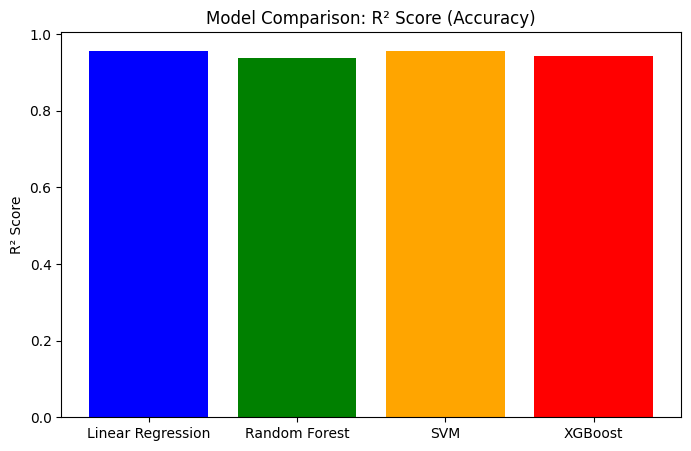

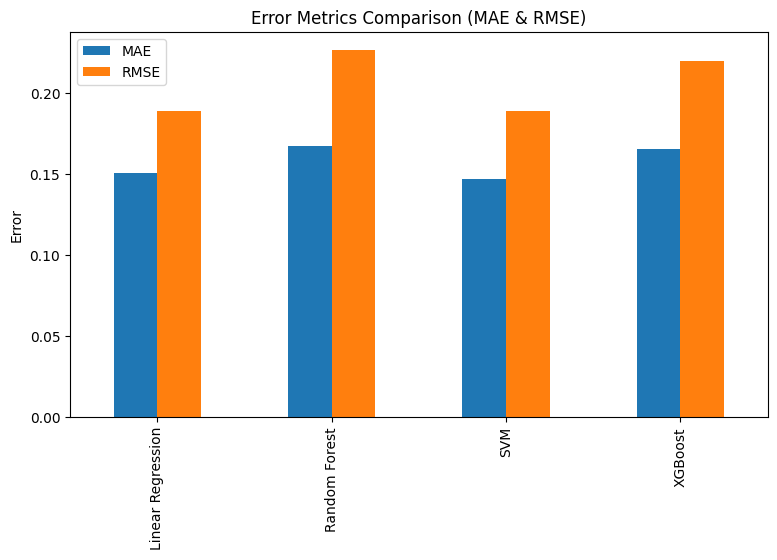

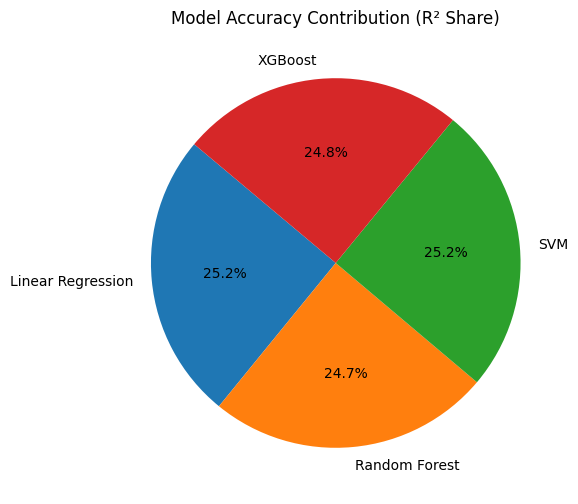

In [63]:
plt.figure(figsize=(8,5))
plt.bar(results_df.index, results_df['R2'], color=['blue','green','orange','red'])
plt.title("Model Comparison: R² Score (Accuracy)")
plt.ylabel("R² Score")
plt.show()

results_df[['MAE','RMSE']].plot(kind='bar', figsize=(9,5))
plt.title("Error Metrics Comparison (MAE & RMSE)")
plt.ylabel("Error")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(results_df['R2'], labels=results_df.index, autopct='%1.1f%%', startangle=140)
plt.title("Model Accuracy Contribution (R² Share)")
plt.show()

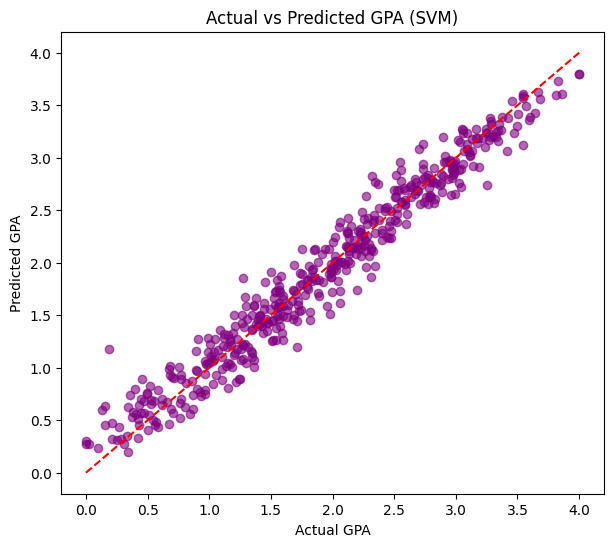


🏆 Best Model: SVM with R² = 0.957


In [64]:
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
Y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(7,6))
plt.scatter(Y_test, Y_best_pred, alpha=0.6, color='purple')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title(f'Actual vs Predicted GPA ({best_model_name})')
plt.show()

print(f"\n🏆 Best Model: {best_model_name} with R² = {results_df['R2'].max():.3f}")


===== Logistic Regression (Classification Results) =====
Accuracy: 0.9499
Precision: 0.9661
Recall: 0.9344
F1 Score: 0.9500

===== Regression Model Comparison =====
               Model        R2       MAE      RMSE
0  Linear Regression  0.956876  0.150524  0.188840
1      Random Forest  0.938044  0.167373  0.226349
2                SVM  0.956986  0.146996  0.188600
3            XGBoost  0.941739  0.165173  0.219495

===== Regression Model Comparison =====
{'Linear Regression': {'R2': 0.956876334205983, 'MAE': 0.150523520908227, 'RMSE': np.float64(0.18883952362168221), 'MAPE': np.float64(13217471.288272722)}, 'Random Forest': {'R2': 0.9380436284324142, 'MAE': 0.16737339093556544, 'RMSE': np.float64(0.2263487227626561), 'MAPE': np.float64(18140612.591645222)}, 'SVM': {'R2': 0.9569855979273708, 'MAE': 0.14699593229640096, 'RMSE': np.float64(0.18860013771712314), 'MAPE': np.float64(12199257.382810999)}, 'XGBoost': {'R2': 0.9417389005039296, 'MAE': 0.16517344677252407, 'RMSE': np.float64(

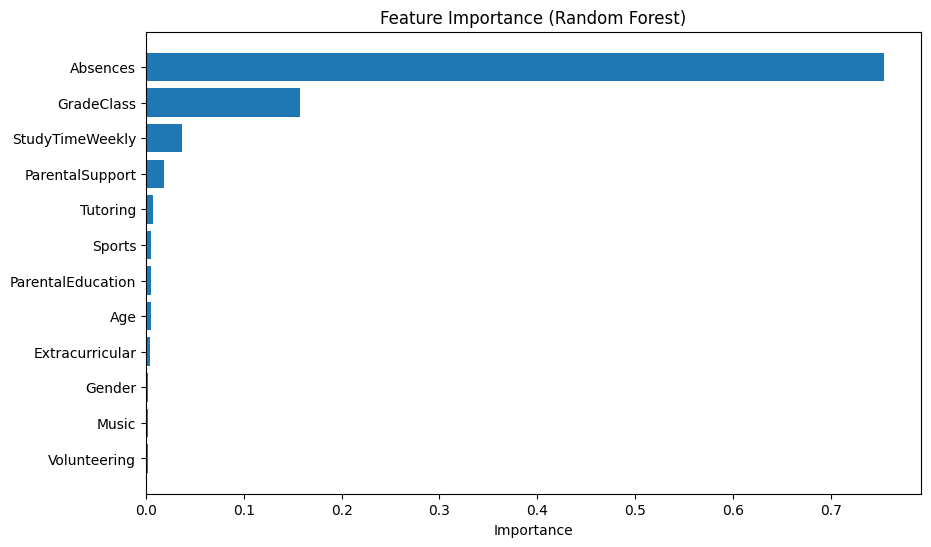


Top 5 Factors Influencing Final Grades:
            Feature  RandomForest Importance  XGBoost Importance
4          Absences                 0.754770            0.421068
11       GradeClass                 0.156930            0.449098
3   StudyTimeWeekly                 0.037138            0.010788
6   ParentalSupport                 0.018481            0.024646
5          Tutoring                 0.007185            0.027296


In [65]:

threshold = Y.mean()
y_class = (Y> threshold).astype(int)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)
y_pred_class = log_reg.predict(X_test_c)

# Classification Metrics
acc = accuracy_score(y_test_c, y_pred_class)
prec = precision_score(y_test_c, y_pred_class)
rec = recall_score(y_test_c, y_pred_class)
f1 = f1_score(y_test_c, y_pred_class)

print("\n===== Logistic Regression (Classification Results) =====")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

# -----------------------------
# 2. Compare Regression Models
# -----------------------------
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

print("\n===== Regression Model Comparison =====")
# Display the R2 Score, MAE, and RMSE columns from the results_df
print(results_df[['Model', 'R2', 'MAE', 'RMSE']])
print("\n===== Regression Model Comparison =====")
print(results)
rf = trained_models['Random Forest']
xgb = trained_models['XGBoost']

# Now the feature importance code will work:
rf_importance = rf.feature_importances_
xgb_importance = xgb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest Importance': rf_importance,
    'XGBoost Importance': xgb_importance
}).sort_values(by='RandomForest Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['RandomForest Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

print("\nTop 5 Factors Influencing Final Grades:")
print(importance_df.head(5))

In [66]:
print("\n===== SAMPLE PREDICTIONS =====")
print(predictions_table.head(15))


===== SAMPLE PREDICTIONS =====
      Actual GPA  Linear Regression  Random Forest       SVM   XGBoost
1004    1.427724           1.452804       1.312339  1.429998  1.437277
196     3.117354           2.978400       3.179863  3.024027  2.967992
2342    2.037769           1.844661       2.443233  1.975093  2.280390
1708    3.548521           3.599423       3.631413  3.590987  3.599936
435     0.248977           0.294961       0.399295  0.307188  0.560139
321     2.627694           2.723684       2.692268  2.724131  2.775365
1472    2.057379           1.652405       1.522975  1.612360  1.569014
1703    2.248338           2.297357       2.192336  2.251570  2.259587
900     2.194707           2.116751       2.191692  2.154666  2.090794
1057    0.758183           1.020809       0.900643  1.008949  1.055941
2213    2.370893           2.571417       2.747778  2.750680  2.980750
575     0.766405           0.635265       0.644809  0.664008  0.507514
1163    2.952722           3.090886       2.7